
# Method 3:- Numerical Missing Value Imputation By Class

# Most Most Important Note:-
#Please ignore all comments in this project because I have written in my own words (or) in my own #language to better understanding about each and every commands.

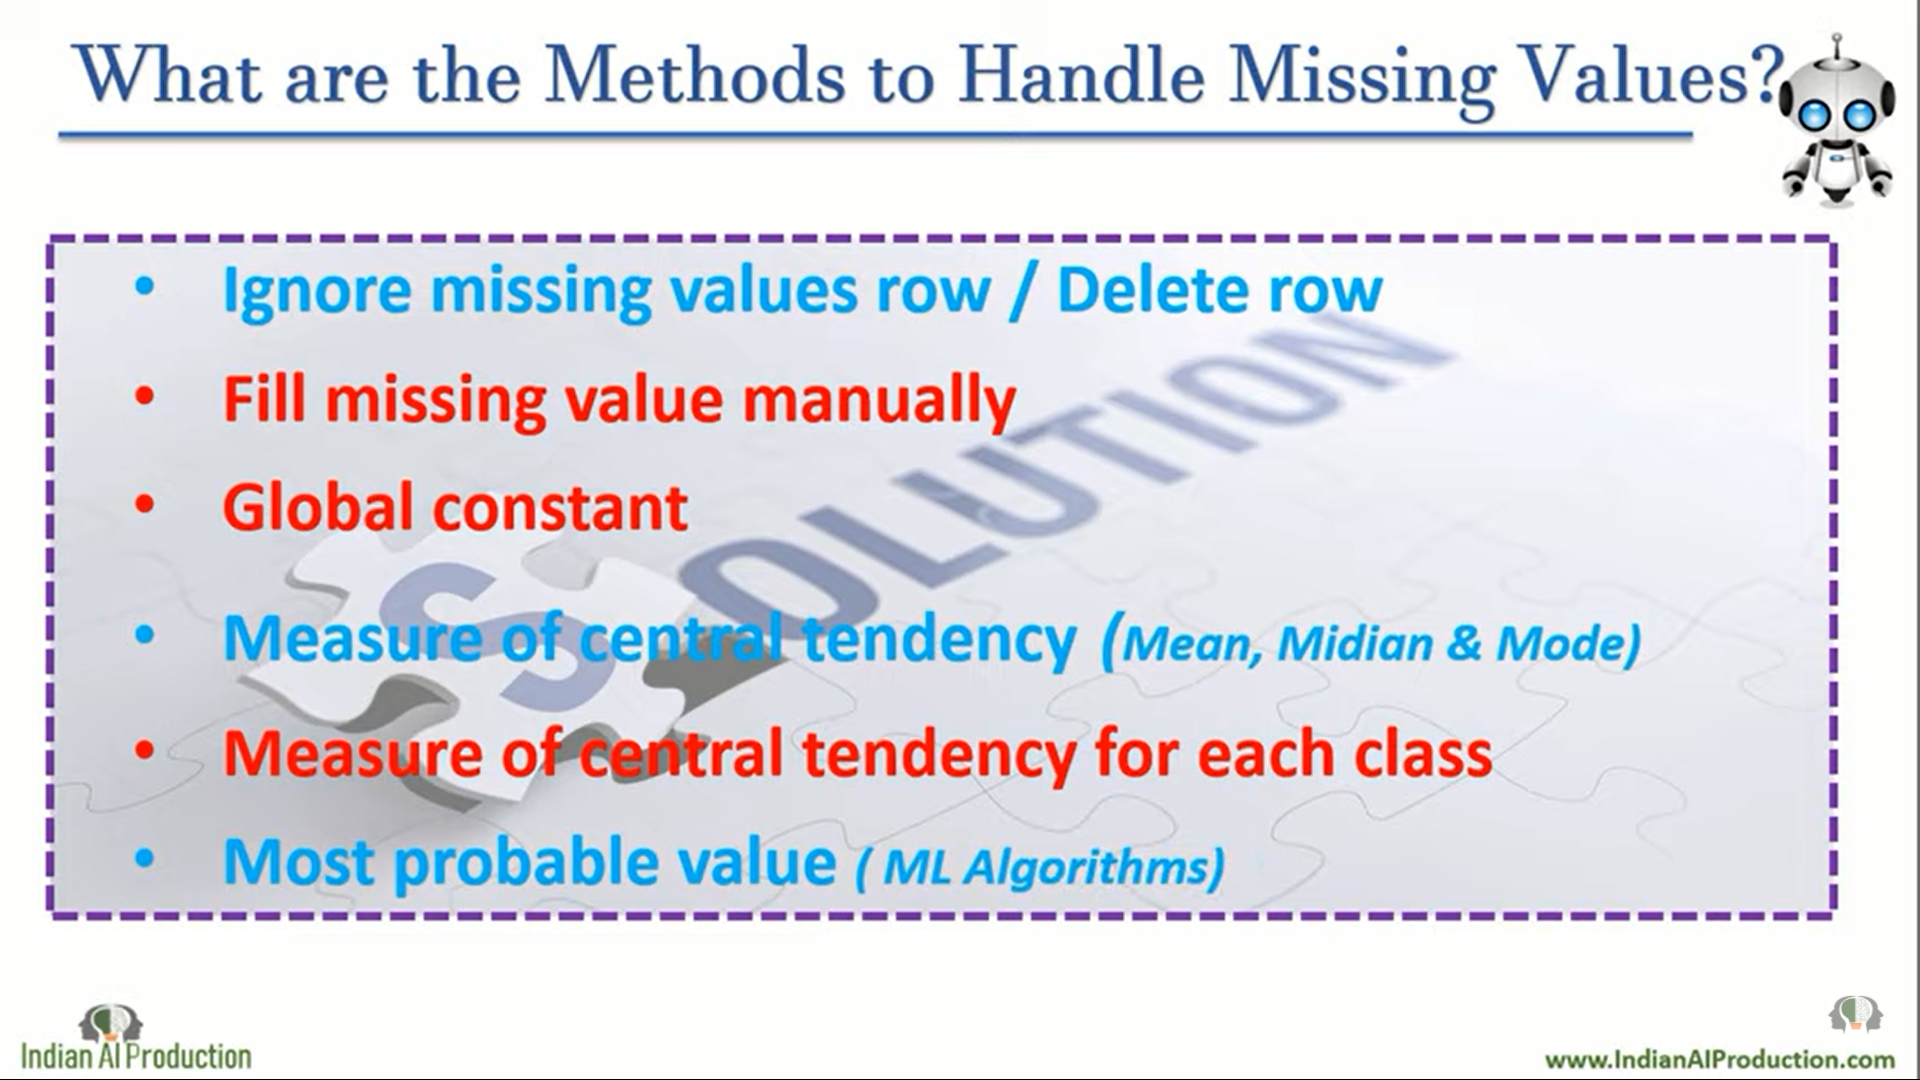

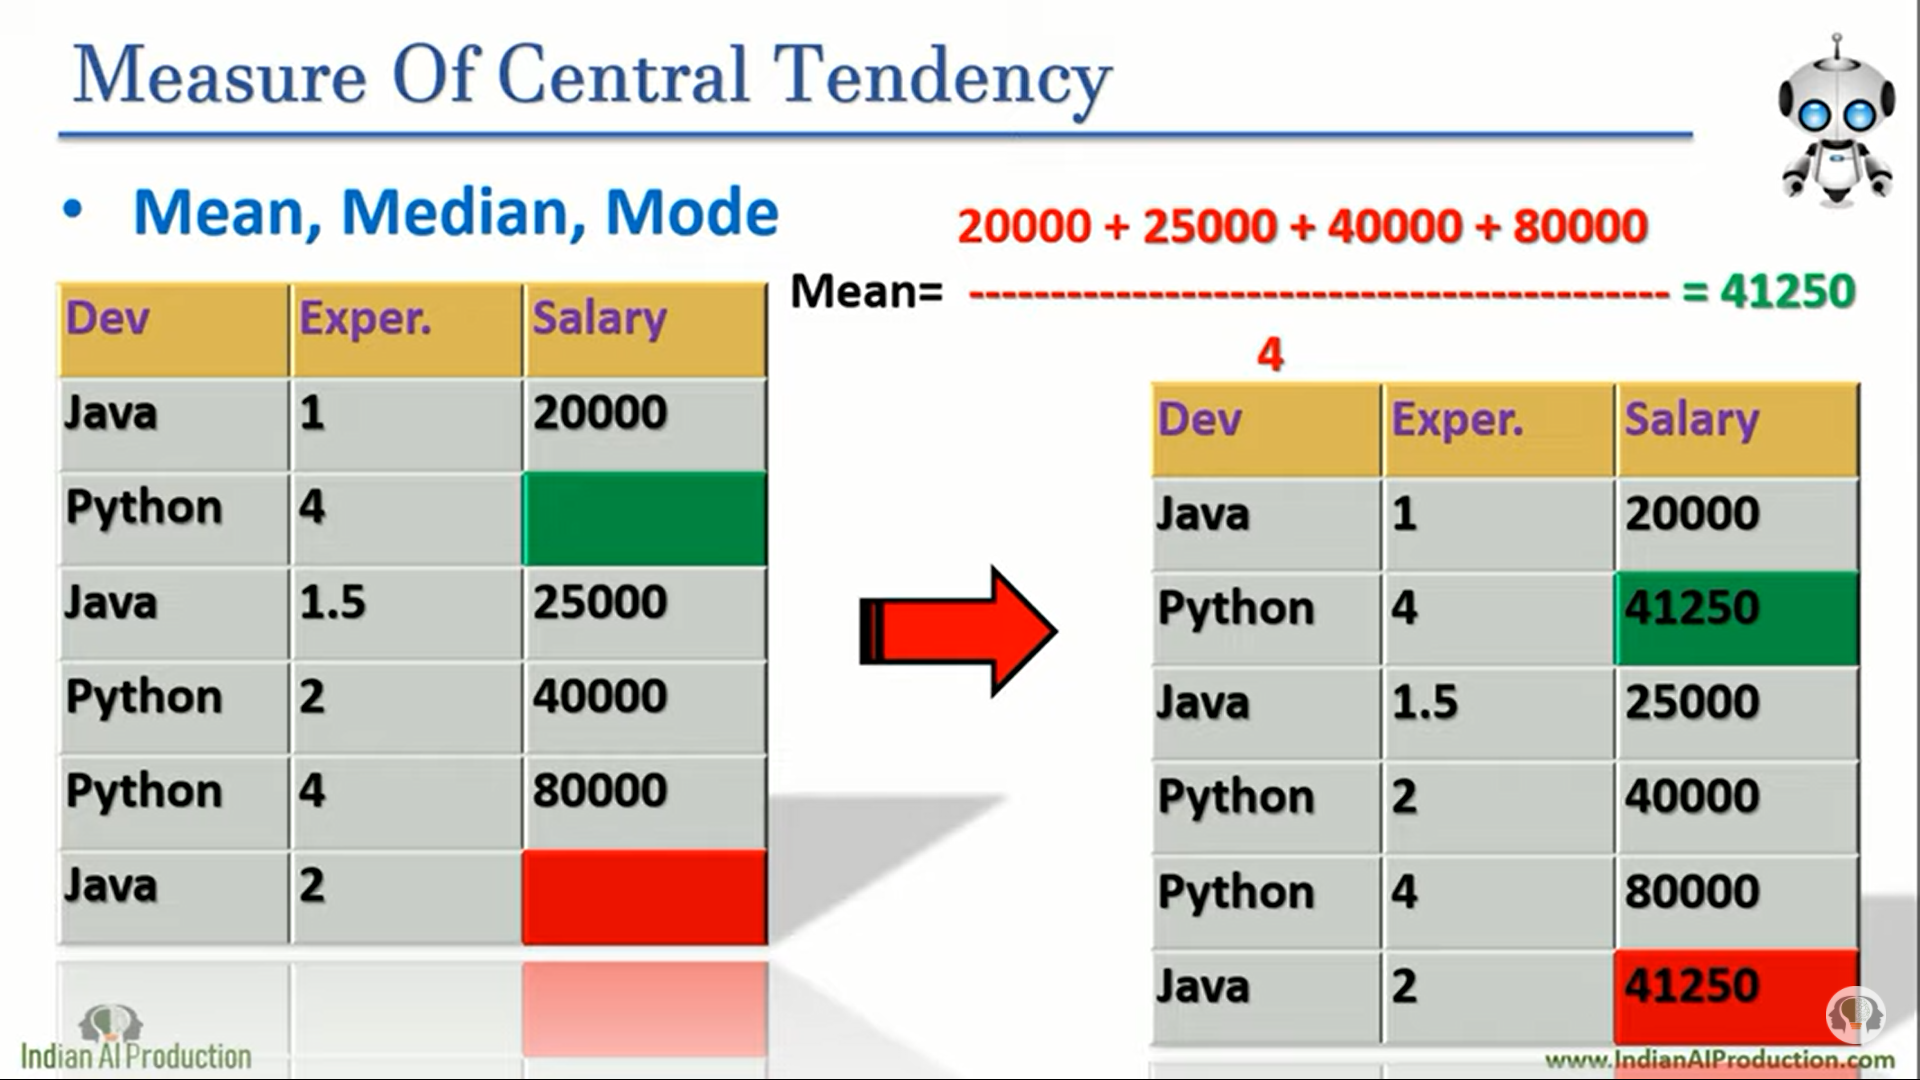

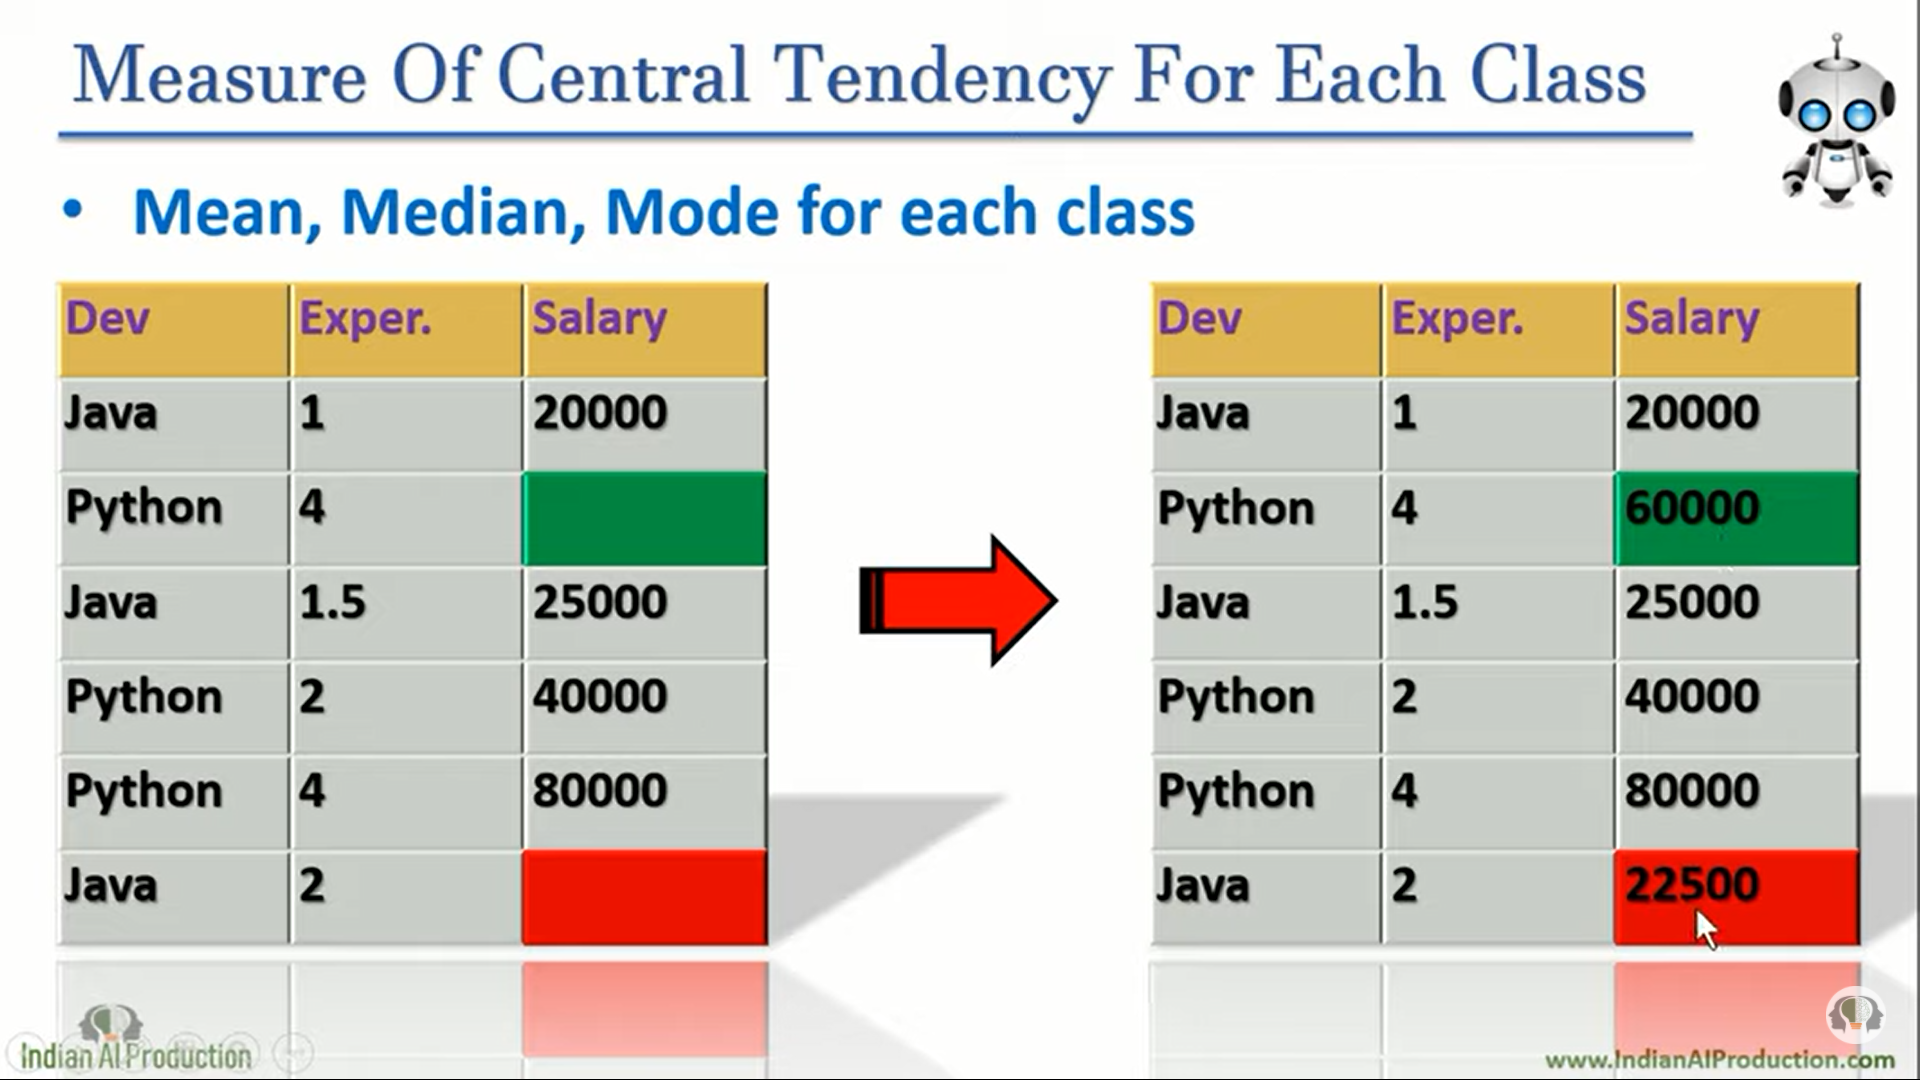

In [ ]:
                                # NOTE:-

# With the Help of "Measure of Central Tendency" hmne missing value ko mean and median ki value se fill kr 
# diya tha pr jb hm ML me model predict krenge toh humko problem aa sakti hai kuch conform nhi hai ki 
# problem aayegi hi but problem aa sakti hai.

# Example me dekho :- hmne jo "java developer" ki salary fill kri hai wohi "Python Developer" ki bhi kri hai
#                     jb ki "Python Developer" ka Experienced double hai "java developer" se.

        
        # NOTE:-
# Issi Problem ko solve krne k liye hum "Measure of Central Tendency For Each Class" Method Use krenge.

# Iss method me Particular field(Class) like "java" ka mean calculate krenge aur jaha jaha "java Developer"
# ki value nhi hai dataset me waha value add kr denge  , etc-etc


In [ ]:
# Step 1:-
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2:-
# Load Dataset

# clean = pd.read_csv(r"C:\Users\shivamsaxena\Desktop\Data_Sets\All Data Sets\house-prices-advanced-regression-techniques")
# In Jupyter Notebook Load Dataset Like this

data1_num = pd.read_csv("/content/train.csv")
data1_num.head(n=6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   
5          GLQ         732          Unf           0         64          796   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   
5    GasA        Ex          Y      SBrkr       796       566             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1      

In [ ]:
data1_num.shape

(1460, 81)

In [ ]:
# jb Dataset me kuch limited hi Columns dikh rhe ho toh Use this:- 

pd.set_option("display.max_columns" , None) # with the help of this command now,seen all columns of This Dataset

pd.set_option("display.max_rows" , None) # Now Seen all Rows Of this "clean" Dataset


In [ ]:
data1_num.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Use Different-Different technique to clean this Data, like clean this "white" spot.


                        # Technique 1:-
# Remove those column where have "No Values" , but first check the % of Missing Value in Column

# Check the % of Missing Value of columns

column_null_percentage = data1_num.isnull().sum()/data1_num.shape[0] * 100       # Find the % Formula
column_null_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [ ]:
# Jiss Column me 20% se jadha Data Missing hai uss ko show krna hai

drop_column = column_null_percentage[column_null_percentage > 20].keys()
drop_column

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
# Delete Columns from Dataset

data2 = data1_num.drop(columns = drop_column)
data2.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [ ]:
data1_num.shape

(1460, 81)

In [ ]:
data2.shape

(1460, 76)

In [ ]:
# show Only "Numeric" Feature of DataSet

apple = data2.select_dtypes(include=['float64' , 'int64']).columns
apple

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
apple = data2.select_dtypes(include=['float64' , 'int64'])
apple.shape

(1460, 38)

In [ ]:
apple.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
# Jiss jiss Row me Null Value Present hai

num_var_miss1 = ['LotFrontage' , 'MasVnrArea' , 'GarageYrBlt']
apple[num_var_miss1][apple[num_var_miss1].isnull().any(axis=1)]

LotFrontage  MasVnrArea  GarageYrBlt
7             NaN       240.0       1973.0
12            NaN         0.0       1962.0
14            NaN       212.0       1960.0
16            NaN       180.0       1970.0
24            NaN         0.0       1968.0
31            NaN         0.0       1966.0
39           65.0         0.0          NaN
42            NaN         0.0       1983.0
43            NaN         0.0       1977.0
48           33.0         0.0          NaN
50            NaN         0.0       1997.0
64            NaN       573.0       1998.0
66            NaN       287.0       1970.0
76            NaN         0.0       1956.0
78           72.0         0.0          NaN
84            NaN        22.0       1995.0
88          105.0         0.0          NaN
89           60.0         0.0          NaN
95            NaN        68.0       1993.0
99           77.0         0.0          NaN
100           NaN        28.0       1977.0
104           NaN       600.0       1951.0
108          85.0         0.0          NaN
111           NaN         0.0       2000.0
113           NaN       184.0       1953.0
116           NaN       116.0       1962.0
120           NaN         0.0       1969.0
125          60.0         0.0          NaN
126           NaN         0.0       1977.0
127          55.0         0.0          NaN
131           NaN        40.0       2000.0
133           NaN       136.0       2001.0
136           NaN       196.0       1967.0
140          70.0         0.0          NaN
147           NaN       180.0       2001.0
148          63.0       120.0          NaN
149           NaN         0.0       1936.0
152           NaN       252.0       1971.0
153           NaN         0.0       1960.0
155          60.0         0.0          NaN
160           NaN         0.0       1984.0
163          55.0         0.0          NaN
165          62.0         0.0          NaN
166           NaN         0.0       1955.0
169           NaN       653.0       1981.0
170           NaN         0.0       1991.0
177           NaN         0.0       1958.0
180           NaN       456.0       2000.0
186           NaN         0.0       1990.0
191           NaN       138.0       1972.0
198          92.0         0.0          NaN
203           NaN       205.0       2004.0
207           NaN         0.0       1960.0
208           NaN       128.0       1988.0
210          67.0         0.0          NaN
214           NaN       153.0       1977.0
218           NaN       312.0       1939.0
221           NaN         0.0       2002.0
234           NaN         NaN       2002.0
237           NaN         0.0       1993.0
241          40.0         0.0          NaN
244           NaN         0.0       1994.0
249           NaN       472.0       1958.0
250          55.0         0.0          NaN
269           NaN       174.0       1987.0
287           NaN         0.0          NaN
288           NaN        31.0       1970.0
291          55.0         0.0          NaN
293           NaN        34.0       1977.0
307           NaN         0.0          NaN
308           NaN         0.0       1961.0
310           NaN       112.0       1993.0
319           NaN       225.0       1980.0
328           NaN         0.0       1930.0
330           NaN        84.0       2002.0
335           NaN         0.0       1965.0
342           NaN       340.0       1949.0
346           NaN         0.0       1960.0
347           NaN        30.0       1960.0
351           NaN         0.0       1986.0
356           NaN       106.0       1992.0
360           NaN         0.0       1978.0
361           NaN         0.0       1940.0
364           NaN       120.0       1976.0
366           NaN       247.0       1963.0
369           NaN         0.0       1997.0
370           NaN         0.0       2000.0
375           NaN         0.0          NaN
384           NaN         0.0       1992.0
386          58.0         0.0          NaN
392           NaN         0.0       1959.0
393           NaN         0.0          NaN
404    

# Main work of this Method are Start Here

In [ ]:
                                    '''Most Most Imp "NOTE" About this "Method"

Jaha bhi "Missing" value hai uss ko fill krna hai, Lekin [CLASS] ka support lena hai, [CLASS] ka support 
lene k liye humko "DOMAIN Knowledge" hona bahot jaruri hai, jiss bhi Dataset pr hm kaam kr rhe hai uss ki 
"DOMAIN Knowledge" kyuki hmko check krna hoga ki "Numerical Variable" ki missing Value ko fill krne k liye 
hmko konse "Class/Catagorical Variable" ka "Reference" lena hai , tbhi hum approximately "Original" Value
ko impute kr payege.'''


# Kisi bhi Particular "Column/Attributes" me kitne type ki Values present hai

data1_num['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [ ]:
''' Dataset me jo 'LotConfig' Column hai, uss k 'Inside' Attribute/Class ka jo data hai uss data ko "Access" 
krna hai aur uss data ka "Mean/Median" lena hai, fir jaha-jaha bhi "Null" data hai "LotFrontage" Column me
Waha-waha woh mean/median value impute kr dena hai.'''


# LotConfig_inside = data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']
# LotConfig_inside

data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# LotConfig_inside.shape

In [ ]:
'''hmko sirf or sirf "LotFrontage" ki value leni hai jo sirf or sirf "LotConfig" k Inside_class ko belong krta 
   hai'''

# LotFrontage_belong_LotConfig = data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']["LotFrontage"]
# LotFrontage_belong_LotConfig

data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']["LotFrontage"]

0        65.0
2        68.0
5        85.0
6        75.0
8        51.0
10       70.0
11       85.0
12        NaN
13       91.0
17       72.0
18       66.0
19       70.0
21       57.0
22       75.0
23       44.0
24        NaN
27       98.0
29       60.0
30       50.0
33       70.0
34       60.0
35      108.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
44       70.0
45       61.0
47       84.0
48       33.0
49       66.0
51       52.0
53       68.0
54       60.0
55      100.0
56       24.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
70       95.0
73       85.0
75       21.0
76        NaN
77       50.0
78       72.0
82       78.0
83       80.0
84        NaN
86      122.0
89       60.0
90       60.0
91       85.0
92       80.0
94       69.0
96       78.0
97       73.0
99       77.0
100       NaN
101      77.0
102      64.0
105      75.0
106      60.0
107      50.0
109     105.0
110   

In [ ]:
# LotFrontage_belong_LotConfig.shape

(1052,)

In [ ]:
'''LotFrontage_belong_LotConfig" k O/P me jitne bhi value present hai usska humko "Mean" lena hai, aur "Mean"
   lena k baad "NAN" value ki jagaha woh "Mean" daal dena hai.'''

# Insert_mean_LotFrontage_belong_LotConfig = data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']["LotFrontage"].replace(np.nan,data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']["LotFrontage"].mean())

# Ye sirf or sirf ek "Inside" Class ko kiya hai, but hmko ye sbhi class k liye krna hai, 
# like:- ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] then Use "for-loop"

data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']["LotFrontage"].replace(np.nan,data1_num[data1_num.loc[: , 'LotConfig'] == 'Inside']["LotFrontage"].mean())

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

In [ ]:
# Insert_mean_LotFrontage_belong_LotConfig

In [ ]:
# ye every class k kiye krna hai Here Class:- ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'] then Use "for-loop"

# 'LotConfig' me jitne bhi classes hai like --> 'Inside', 'FR2', 'Corner', 'CulDSac', 'FR3' , inn classes se
# belong krne wala "LotFrontage" ussme jaha pr bhi value present nhi hai uss me fill krenge.

data1_num_copy = data1_num.copy()

for var_class in data1_num['LotConfig'].unique():
    data1_num_copy.update(data1_num[data1_num.loc[: , 'LotConfig'] == var_class]["LotFrontage"].replace(np.nan,data1_num[data1_num.loc[: , 'LotConfig'] == var_class]["LotFrontage"].mean()))


In [ ]:
data1_num.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
data1_num_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# seen Categorical Variable

data1_num.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
data1_num.select_dtypes(include=['object']).columns.shape

(43,)

In [ ]:
data1_num.shape

(1460, 81)

In [ ]:
apple.shape

(1460, 38)

In [ ]:
# clean[clean[['GarageType']].isnull().any(axis=1)].head(10)

# Use Mean

In [ ]:
'''jse hmne "LotFrontage"(Numerical data) ki "NaN" Values ko "LotConfig"(Categorial data) ki Values se impute 
   kr diya, aisehi hum aur jo 2 ['MasVnrArea', 'GarageYrBlt'] "Numerical data" ha unnko bhi 2 (Categorial data) 
   values se impute krna hoga.'''

data1_num_copy = data1_num.copy()

num_vars_miss = ['LotFrontage' , 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig' ,'Exterior2nd' ,'KitchenQual']
for cat_var, num_var_miss in zip(cat_vars, num_vars_miss):
    for var_class in data1_num[cat_var].unique():
        data1_num_copy.update(data1_num[data1_num.loc[: , cat_var] == var_class][num_vars_miss].replace(np.nan,data1_num[data1_num.loc[: , cat_var] == var_class][num_vars_miss].mean()))


In [ ]:
data1_num_copy[num_vars_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
data1_num_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Data Distribution of Method-3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

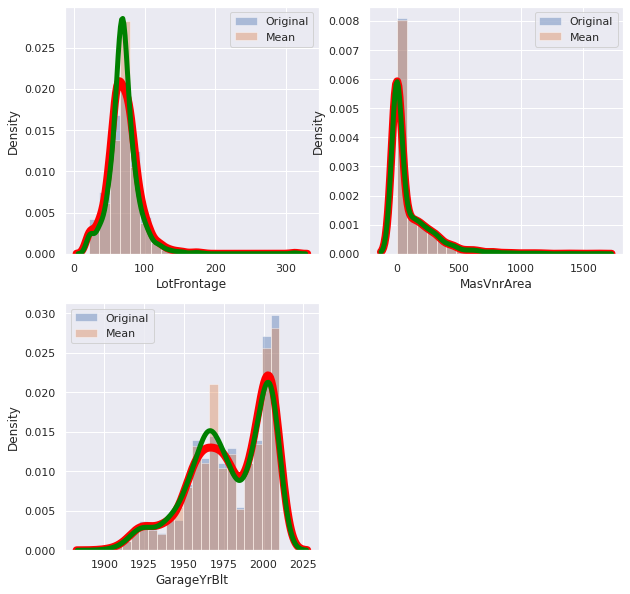

In [ ]:
plt.figure(figsize=(10,10))
sns.set()

for i, var in enumerate(num_vars_miss):
    plt.subplot(2 , 2 , i+1)
    sns.distplot(data1_num[var] , bins=20 , kde_kws={'linewidth':8 , 'color': "red"} , label='Original')
    sns.distplot(data1_num_copy[var] , bins=20 , kde_kws={'linewidth':5 , 'color': "green"} , label='Mean')
    plt.legend()

# Use Median 

In [ ]:
data1_num_copy_median = data1_num.copy()

num_vars_miss = ['LotFrontage' , 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotConfig' ,'Exterior2nd' ,'KitchenQual']
for cat_var, num_var_miss in zip(cat_vars, num_vars_miss):
    for var_class in data1_num[cat_var].unique():
        data1_num_copy_median.update(data1_num[data1_num.loc[: , cat_var] == var_class][num_vars_miss].replace(np.nan,data1_num[data1_num.loc[: , cat_var] == var_class][num_vars_miss].median()))


In [ ]:
data1_num_copy_median[num_vars_miss].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

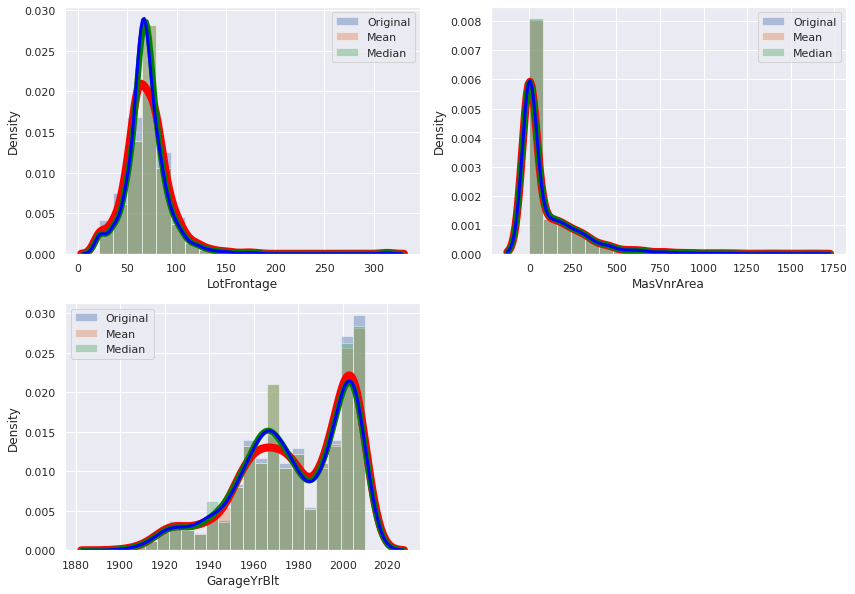

In [ ]:
plt.figure(figsize=(14,10))
sns.set()

for i, var in enumerate(num_vars_miss):
    plt.subplot(2 , 2 , i+1)
    sns.distplot(data1_num[var] , bins=20 , kde_kws={'linewidth':8 , 'color': "red"} , label='Original')
    sns.distplot(data1_num_copy[var] , bins=20 , kde_kws={'linewidth':6 , 'color': "green"} , label='Mean')
    sns.distplot(data1_num_copy_median[var] , bins=20 , kde_kws={'linewidth':3 , 'color': "blue"} , label='Median')

    plt.legend()

# Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

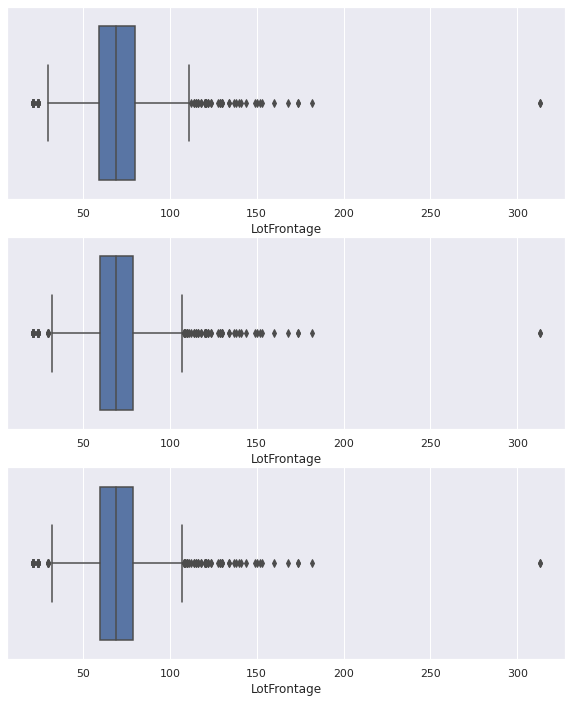

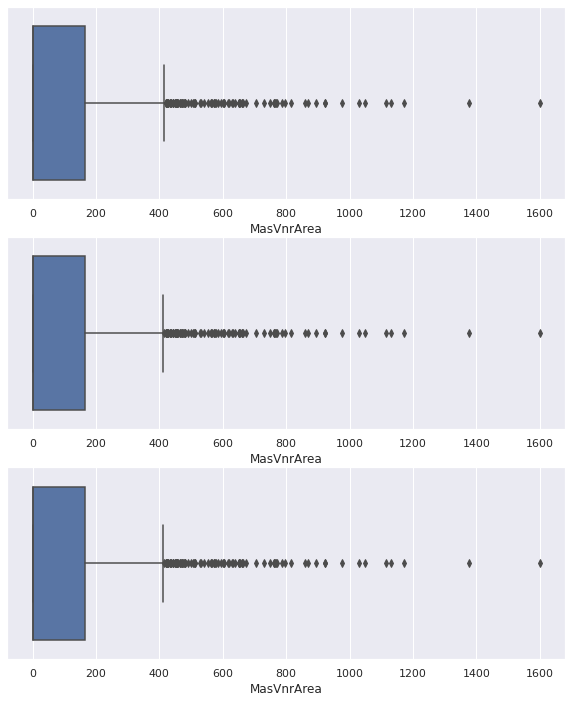

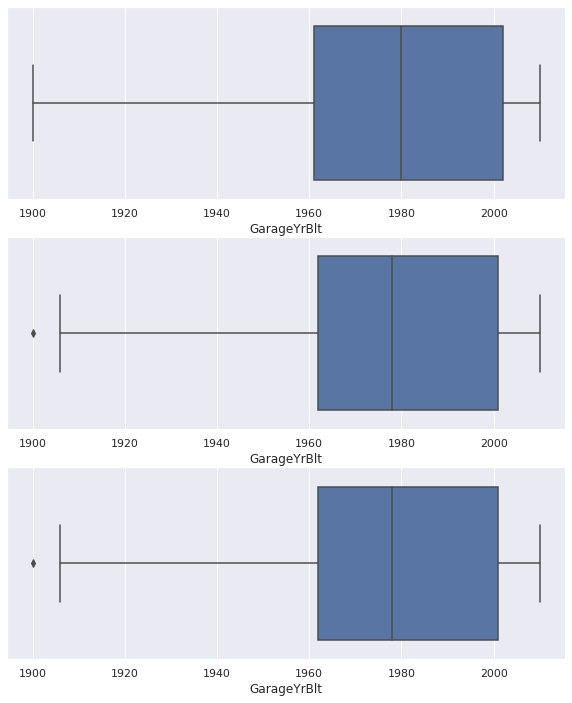

In [ ]:
# Check The "Outliers" in Dataset then we use Specially Boxplot

for i , var in enumerate(num_vars_miss):
    plt.figure(figsize=(10,12))
    plt.subplot(3,1,1)
    sns.boxplot(data1_num[var])
    plt.subplot(3,1,2)
    sns.boxplot(data1_num_copy[var])
    plt.subplot(3,1,3)
    sns.boxplot(data1_num_copy_median[var])

In [ ]:
# Technique 3 - Finish Here, (Numerical Missing Value Imputation By Class)